<a href="https://colab.research.google.com/github/ArmheinSauce/Movie-Recommender-System/blob/main/Movie_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="Blue"><p style="text-align: center;">MOVIE RECOMMENDER SYSTEM</p> </font>
***
***<font color="Blue">  <p style="text-align: center;">Certification Project</p> </font>***
<font color="Blue"> <p style="text-align: center;">Enrique Armengol</p> </font>

## Import libraries

***

In [158]:
import io
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from google.colab import files
from IPython.display import clear_output
from IPython.display import display
from ipywidgets import Button, Layout
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Load the Datasets

***

In [159]:
movies_old = pd.read_csv('https://raw.githubusercontent.com/ArmheinSauce/Movie-Recommender-System/main/datasets/movies.csv')
ratings = pd.read_csv('https://raw.githubusercontent.com/ArmheinSauce/Movie-Recommender-System/main/datasets/ratings.csv')

## Getting information about the Datasets

***

#### Information about Movies Dataset

***

##### We observe that the movies dataset has three columns 

In [160]:
movies_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [161]:
movies_old.shape

(10329, 3)

Let's observe the entries of the dataset

In [162]:
movies_old.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [163]:
movies_old.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


##### Number of unique movies

In [164]:
movies_old.movieId.nunique()

10329

We can split the year into a separate column for a better analysis

In [165]:
# dropping null value columns to avoid errors
#movies_old.dropna(inplace = True)
 
# new data frame with split value columns
#movies_year = movies_old["title"].str.split("(", n = 1, expand = True)
 
# making separate first name column from new data frame
#movies_old["title_"]= movies_year[0]
 
# making separate last name column from new data frame
#movies_old["year_"]= movies_year[1]
 
# Dropping old Name columns
#movies_old.drop(columns =["title"], inplace = True)
 
# df display
movies = movies_old.copy()

movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


## Information about Ratings Dataset

***

##### The ratings dataset has four columns

In [166]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


##### Number of ratings in the dataset

In [167]:
ratings.shape

(105339, 4)

In [168]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [169]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


Let's see the number of unique users in the ratings dataset

In [170]:
ratings.userId.nunique()

668

# Cleaning the Datasets

***

#### Now we explore if we have  null values in any of both datasets as follows:

In [171]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [172]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

##### In this case we have zero null values.

##### We verify if we have repeated values

In [173]:
movies.duplicated().sum()

0

In [174]:
ratings.duplicated().sum()

0

And we have zero repeated values too.

# Visualization of the movies Dataset

***

##### In order to explore more the datasets, we save all the genres that appear in any movie in a function:

In [175]:
def save_genres_list():
    genres=[]
    for genre in movies.genres:  
        x=genre.split('|')
        for i in x:
             if i not in genres:
                genres.append(str(i))
    genres=str(genres)  
    return genres

In [176]:
save_genres_list()

"['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'War', 'Musical', 'Documentary', 'Western', 'Film-Noir', '(no genres listed)']"

In [177]:
def save_genres_list_2():
    genres_2 = []
    for genre in movies.genres:
        genres_2.append(str(genre))
    genres_2 = str(genres_2)
    return genres_2

In [178]:
save_genres_list_2()

"['Adventure|Animation|Children|Comedy|Fantasy', 'Adventure|Children|Fantasy', 'Comedy|Romance', 'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller', 'Comedy|Romance', 'Adventure|Children', 'Action', 'Action|Adventure|Thriller', 'Comedy|Drama|Romance', 'Comedy|Horror', 'Adventure|Animation|Children', 'Drama', 'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance', 'Comedy', 'Comedy', 'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller', 'Crime|Drama|Horror|Mystery|Thriller', 'Action|Crime|Thriller', 'Drama|Sci-Fi', 'Drama|Romance', 'Drama', 'Children|Drama', 'Drama|Romance', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi', 'Crime|Drama', 'Drama', 'Mystery|Sci-Fi|Thriller', 'Adventure|Romance|IMAX', 'Children|Drama', 'Drama|Romance', 'Crime|Drama', 'Comedy|Romance', 'Drama', 'Drama|War', 'Action|Crime|Drama', 'Drama', 'Action|Adventure|Fantasy', 'Comedy|Drama|Thriller', 'Drama|Romance', 'Mystery|Thriller', 'Animation|Children|Drama|Musical|Romance', 'Drama|Romance', 'Crime|M

In [179]:
def save_movie_titles():
    titles = []
    for title in movies.title:
        titles.append(title[0:-7])
    titles = str(titles)
    return titles

### We can explore the frequency in the movies by genres, let's see the top 10 genres with more movies

In [180]:
genres_counts = movies["genres"].value_counts().head(10) #Taking top 10 genres with highest counts
genres_hist = pd.DataFrame(genres_counts.reset_index())
genres_hist.columns =["genres","count"]
genres_hist

,genres,count
0,Drama,1385
1,Comedy,826
2,Comedy|Drama,465
3,Drama|Romance,421
4,Comedy|Romance,363
5,Documentary,300
6,Comedy|Drama|Romance,286
7,Drama|Thriller,212
8,Crime|Drama,188
9,Horror,170


Now we use Plotly to create a histogram to a better vosualization of the data that we just obtain.

In [181]:
fig = px.histogram(
    genres_hist,x="genres", y="count",
    height=600,
    width=1000,
    template="seaborn",
    color_discrete_sequence=["darkred"],
)
fig.update_layout(
    title={"text": "Histogram", "font": {"size": 25}},
    title_font_family="Times New Roman",
    title_font_color="midnightblue",
    bargap=0.1,
)
fig.update_layout(
    font_family="Times New Roman",
    font_color="midnightblue",
    yaxis_title={"text": "Number of movies", "font": {"size": 18}},
    xaxis_title={"text": "Genres", "font": {"size": 18}},
)
fig.show()

***

### We create a visualization using WordCloud

#### WordCloud of the genres

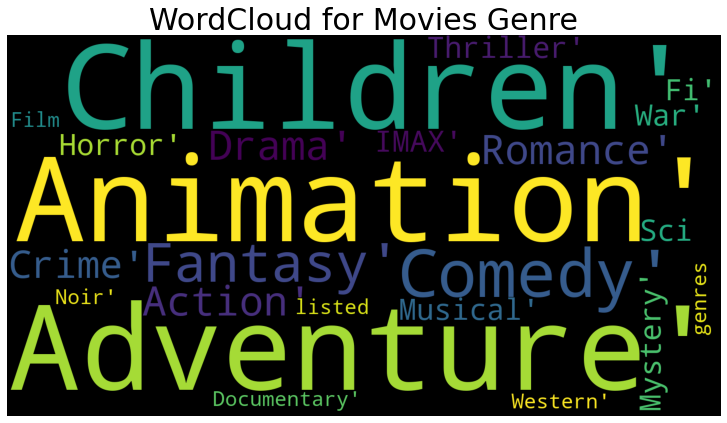

In [182]:
# Create and generate a word cloud image:
wordcloud_genre = WordCloud(
    width=1500, height=800, background_color="black", min_font_size=2, min_word_length=3
).generate(save_genres_list())

# Display the generated image:
plt.figure(figsize=(23, 7))
plt.axis("off")
plt.title("WordCloud for Movies Genre", fontsize=30)
plt.imshow(wordcloud_genre)


#### WordCloud of the movie titles

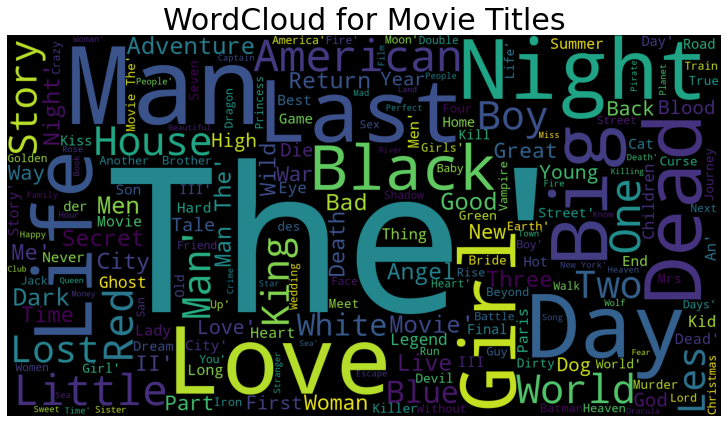

In [183]:
# Create and generate a word cloud image:
wordcloud_genre = WordCloud(
    width=1500, height=800, background_color="black", min_font_size=2, min_word_length=3
).generate(save_movie_titles())

# Display the generated image:
plt.figure(figsize=(23, 7))
plt.axis("off")
plt.title("WordCloud for Movie Titles", fontsize=30)
plt.imshow(wordcloud_genre)


# Exploratory Data Analysis

***

##### From the analysis of the datasets we now that we have **105339** different **ratings** and **668** unique **users**, let's see how many ratings per user are by using the `groupby()` operation of *pandas*:

In [184]:
ratings_per_user = ratings.groupby('userId').agg(rating_count = ('rating', 'count'))
ratings_per_user

,rating_count
userId,
1,113
2,29
3,73
4,124
5,68
...,...
664,74
665,227
666,225


##### We can sort the rating count values in ascending order to view the user with higher rating count.

In [185]:
ratings_per_user.sort_values(by=['rating_count'], ascending = False).head(6)

,rating_count
userId,
668,5678
575,2837
458,2086
232,1421
310,1287
475,1249


##### Let's see how many movies have been rated on average by a user:




In [186]:
ratings_per_user.mean()

rating_count    157.693114
dtype: float64

##### Now that we have theratings per user, we can visualize them in a *histogram*, so we construct it as follows using the **plotly** library

In [187]:
fig = px.histogram(
    ratings_per_user,
    x="rating_count",
    height=500,
    width=900,
    template="seaborn",
    color_discrete_sequence=["darkred"],
)
fig.update_layout(
    title={"text": "Histogram", "font": {"size": 25}},
    title_font_family="Times New Roman",
    title_font_color="midnightblue",
    bargap=0.1,
)
fig.update_layout(
    font_family="Times New Roman",
    font_color="midnightblue",
    yaxis_title={"text": "Number of users", "font": {"size": 18}},
    xaxis_title={"text": "Number of reviews", "font": {"size": 18}},
)
fig.show()

In [188]:
fig = px.box(
    ratings_per_user,
    x="rating_count",
    height=500,
    width=900,
    template="seaborn",
    color_discrete_sequence=["darkred"],
)
fig.update_layout(
    title={"text": "Histogram", "font": {"size": 25}},
    title_font_family="Times New Roman",
    title_font_color="midnightblue",
    bargap=0.1,
)
fig.update_layout(
    font_family="Times New Roman",
    font_color="midnightblue",
    yaxis_title={"text": "Number of users", "font": {"size": 18}},
    xaxis_title={"text": "Number of reviews", "font": {"size": 18}},
)
fig.show()



##### Now we want to explore the histogram of the ratings per movie, so we use a similar procedure to do obtain that information:

In [189]:
ratings_per_movie = ratings.groupby('movieId').agg(rating_count = ('rating', 'count'))

ratings_per_movie.sort_values(by=['rating_count'], ascending = False)

,rating_count
movieId,
296,325
356,311
318,308
480,294
593,290
...,...
26726,1
26717,1
26712,1


In [190]:
ratings_per_movie.mean()

rating_count    10.202324
dtype: float64

In [191]:
fig = px.histogram(
    ratings_per_movie,
    x="rating_count",
    height=500,
    width=900,
    template="seaborn",
    color_discrete_sequence=["darkred"],
)
fig.update_layout(
    title={"text": "Histogram", "font": {"size": 25}},
    title_font_family="Times New Roman",
    title_font_color="midnightblue",
    bargap=0.1,
)
fig.update_layout(
    font_family="Times New Roman",
    font_color="midnightblue",
    yaxis_title={"text": "Number of movies", "font": {"size": 18}},
    xaxis_title={"text": "Number of ratings", "font": {"size": 18}},
)
fig.show()


In [192]:
fig = px.box(
    ratings_per_movie,
    x="rating_count",
    height=500,
    width=900,
    template="seaborn",
    color_discrete_sequence=["darkred"],
)
fig.update_layout(
    title={"text": "Box Plot", "font": {"size": 25}},
    title_font_family="Times New Roman",
    title_font_color="midnightblue",
    bargap=0.1,
)
fig.update_layout(
    font_family="Times New Roman",
    font_color="midnightblue",
    yaxis_title={"text": "Number of movies", "font": {"size": 18}},
    xaxis_title={"text": "Number of ratings", "font": {"size": 18}},
)
fig.show()


#### Now we create another DataFrame with the movies and number of ratings, we want to know what are the more popular movies, so we want to filter the data to a high number of ratings.


> #### First filter the data to 50 number of ratings per movie




In [193]:
ratings_per_movie.head()

,rating_count
movieId,
1,232
2,92
3,58
4,11
5,62


In [194]:
df_1 = pd.DataFrame(ratings_per_movie)
df_1.head()

,rating_count
movieId,
1,232
2,92
3,58
4,11
5,62


In [195]:
filtered_movie = df_1[df_1.rating_count >= 50]
filtered_movie.sort_values(by=['rating_count'], ascending = False)

,rating_count
movieId,
296,325
356,311
318,308
480,294
593,290
...,...
5502,50
1466,50
1333,50


###### And we save the Id of the **popular movies** for further use.

In [196]:
popular_movies = filtered_movie.index.to_list()

Similarly we can filter to get users with a higher number of reviews.

Let's filter for users with more than 100 reviews:

In [197]:
ratings_per_user.sort_values(by=['rating_count'], ascending = False).head(5)

,rating_count
userId,
668,5678
575,2837
458,2086
232,1421
310,1287


In [198]:
df_2 = pd.DataFrame(ratings_per_user)

filtered_user = df_2[df_2.rating_count >= 100]

And we obtain 258 users with more than 100 reviews.






In [199]:
prolific_users = filtered_user.index.to_list()
len(prolific_users)

258

# Joining the two Datasets 

***

In [200]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [201]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


##### We use a left join to combine the two datasets without the extra movieId column

In [202]:
dataset = pd.merge(movies, ratings, how='left', on='movieId')


##### We observe that now we have as much iterations of a movie as a number of reviews 

In [203]:
dataset.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,5.0,8.590469e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1.303501e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,5.0,8.586109e+08
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.0,8.508158e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14.0,4.0,8.517663e+08


In [204]:
dataset.loc[dataset['title']=='Johnny Express (2014)']

,movieId,title,genres,userId,rating,timestamp
105103,128991,Johnny Express (2014),Animation|Comedy|Sci-Fi,NaN,NaN,NaN


In [205]:
dataset.shape

(105343, 6)

In [206]:
dataset.isnull().sum()

movieId      0
title        0
genres       0
userId       4
rating       4
timestamp    4
dtype: int64

#### We see that after the join of the datasets we have a few null values, let's explore them

In [207]:
dataset[dataset.isnull().any(axis=1)]

,movieId,title,genres,userId,rating,timestamp
83616,7243,Intolerance: Love's Struggle Throughout the Ag...,Drama,NaN,NaN,NaN
86274,8785,Early Summer (Bakushû) (1951),Drama,NaN,NaN,NaN
94081,54290,Bratz: The Movie (2007),Comedy,NaN,NaN,NaN
105103,128991,Johnny Express (2014),Animation|Comedy|Sci-Fi,NaN,NaN,NaN


### Note that we have a few null values, there are only four so we drop them

In [208]:
dataset.dropna(inplace=True)

In [209]:
dataset.shape

(105339, 6)

# Exploratory analysis of the New Dataset

***

### As we already know for the previous analysis, we have **105339** different **ratings**, **668** unique **users**, **10329** different movies and **10325** movies with a review, in the datasets.

#### Now we see the number of ratings per movie with this data set that includes title and genres.

##### First we create a dataset with the titles and the rating

In [210]:
# titles_with_rating = dataset[['title', "year", 'genres', 'rating']]

titles_with_rating = dataset[['title', 'genres', 'rating']]

titles_with_rating.head()

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0


##### Now we group by the movie title and we obtain the _number of ratings per movie_

In [211]:
ratings_per_movie_2 = (
    titles_with_rating.groupby(["title", "genres"]).count()["rating"].reset_index()
)
ratings_per_movie_2.rename(columns={"rating": "num_ratings"}, inplace=True)
ratings_per_movie_2


,title,genres,num_ratings
0,'71 (2014),Action|Drama|Thriller|War,1
1,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,1
2,'Round Midnight (1986),Drama|Musical,1
3,'Til There Was You (1997),Drama|Romance,3
4,"'burbs, The (1989)",Comedy,20
...,...,...,...
10320,loudQUIETloud: A Film About the Pixies (2006),Documentary,1
10321,xXx (2002),Action|Crime|Thriller,24
10322,xXx: State of the Union (2005),Action|Crime|Thriller,7
10323,¡Three Amigos! (1986),Comedy|Western,40


In [212]:
df=ratings_per_movie_2[ratings_per_movie_2['title']=='Toy Story (1995)']
df

,title,genres,num_ratings
9381,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,232


#### We can also inspect the average of the ratings of each movie

In [213]:
mean_rating_movie = titles_with_rating.groupby('title').mean()['rating'].reset_index()
mean_rating_movie.rename(columns={'rating':'mean_ratings'},inplace=True)
mean_rating_movie


,title,mean_ratings
0,'71 (2014),3.500000
1,'Hellboy': The Seeds of Creation (2004),3.000000
2,'Round Midnight (1986),2.500000
3,'Til There Was You (1997),4.000000
4,"'burbs, The (1989)",3.125000
...,...,...
10318,loudQUIETloud: A Film About the Pixies (2006),4.500000
10319,xXx (2002),2.958333
10320,xXx: State of the Union (2005),2.071429
10321,¡Three Amigos! (1986),3.012500


#### And we can observe the histogram to see the frecuency in the mean rating per number of movies.

In [214]:
fig = px.histogram(
    mean_rating_movie,
    x="mean_ratings",
    height=500,
    width=900,
    template="seaborn",
    color_discrete_sequence=["darkred"],
)
fig.update_layout(
    title={"text": "Histogram", "font": {"size": 25}},
    title_font_family="Times New Roman",
    title_font_color="midnightblue",
    bargap=0.1,
)
fig.update_layout(
    font_family="Times New Roman",
    font_color="midnightblue",
    yaxis_title={"text": "Number of movies", "font": {"size": 18}},
    xaxis_title={"text": "Mean rating", "font": {"size": 18}},
)
fig.show()


##### Now we merge the two sets

In [215]:
num_mean_ratings = ratings_per_movie_2.merge(mean_rating_movie,on='title')
num_mean_ratings

,title,genres,num_ratings,mean_ratings
0,'71 (2014),Action|Drama|Thriller|War,1,3.500000
1,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,1,3.000000
2,'Round Midnight (1986),Drama|Musical,1,2.500000
3,'Til There Was You (1997),Drama|Romance,3,4.000000
4,"'burbs, The (1989)",Comedy,20,3.125000
...,...,...,...,...
10320,loudQUIETloud: A Film About the Pixies (2006),Documentary,1,4.500000
10321,xXx (2002),Action|Crime|Thriller,24,2.958333
10322,xXx: State of the Union (2005),Action|Crime|Thriller,7,2.071429
10323,¡Three Amigos! (1986),Comedy|Western,40,3.012500


##### Inspect a little this new dataset to observe the max and min values

In [216]:
num_mean_ratings.describe()

,num_ratings,mean_ratings
count,10325.000000,10325.000000
mean,10.202324,3.177253
std,22.832341,0.817489
min,1.000000,0.500000
25%,1.000000,2.750000
50%,3.000000,3.272727
75%,8.000000,3.750000
max,325.000000,5.000000


#### We note that the largest number of ratings in a movie is __325__, that information is important for the recommender system.

# Popularity-based recommender system ( Without average weighted rating)

***

#####  Our first task of the project is to create a popularity-based recommender system with the datasets that we have been analyzing.

##### This recommender system will have the next characteristics:

* The user will input a genre (g)
* a minimum threshold for a movie (t)
* The number of recommendations he wants (N)

##### **It will recommend the top (N) movies more popular within the genre (g) inputed by the user _ordering_ by _ratings_ in descending order where each movie has at least (t) reviews.** 




##### In order to make this we implement the techniques of filtering with pandas, we already have the dataset prepared with the genres and the ratings, so we create a function that recommends the movies.

In [217]:
def popular_recommend_by_genre(genre, num_ratings, num_recoms):
    popular_df = (
        num_mean_ratings[
            (num_mean_ratings["num_ratings"] >= num_ratings)
            & (num_mean_ratings["genres"].str.contains(genre))
        ][["title", "mean_ratings", "num_ratings"]]
        .sort_values("mean_ratings", ascending=False)
        .head(num_recoms)
    )
    popular_df.rename(
        columns={
            "title": "Movie_Title",
            "mean_ratings": "Average_Movie_Rating",
            "num_ratings": "Num_Reviews",
        },
        inplace=True,
    )
    return display(popular_df)

#### We applied ipywidgets to this function

In [218]:
style = {'description_width': 'initial'}
genre = widgets.Text(description='Introduce a genre:', style=style)
num_ratings = widgets.IntText(description='Introduce number of reviews:', style=style)
num_recoms = widgets.IntText(description='Introduce number of movies:', style=style)

In [219]:
button = widgets.Button(
    description="Recommend me movies!", layout=Layout(width="50%", height="80px")
)
button2 = widgets.Button(
    description="New search", layout=Layout(width="20%", height="80px")
)
inputs = widgets.VBox([genre, num_ratings, num_recoms])
interface = widgets.HBox([inputs, button, button2])


In [220]:
def on_button_clicked(b):
    g = genre.value
    t = num_ratings.value
    N = num_recoms.value 
    popular_recommend_by_genre(g, t, N)

def on_button_clicked2(b):
    clear_output()
    display(interface)
    
button2.on_click(on_button_clicked2)
button.on_click(on_button_clicked)


In [221]:
interface

***

# Popularity-based recommender system ( With average weighted rating)

***

Weighted Average
Weighted average is a calculation that takes into account the varying degrees of importance of the numbers in a data set. In calculating a weighted average, each number in the data set is multiplied by a predetermined weight before the final calculation is made.

A weighted average can be more accurate than a simple average in which all numbers in a data set are assigned an identical weight

where,

* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

- We already have v(vote_count) and R (vote_average) and C can be calculated as

In [222]:
num_mean_ratings_new = num_mean_ratings.copy()
num_mean_ratings_new

,title,genres,num_ratings,mean_ratings
0,'71 (2014),Action|Drama|Thriller|War,1,3.500000
1,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,1,3.000000
2,'Round Midnight (1986),Drama|Musical,1,2.500000
3,'Til There Was You (1997),Drama|Romance,3,4.000000
4,"'burbs, The (1989)",Comedy,20,3.125000
...,...,...,...,...
10320,loudQUIETloud: A Film About the Pixies (2006),Documentary,1,4.500000
10321,xXx (2002),Action|Crime|Thriller,24,2.958333
10322,xXx: State of the Union (2005),Action|Crime|Thriller,7,2.071429
10323,¡Three Amigos! (1986),Comedy|Western,40,3.012500


In [223]:
def popular_recommend_by_genre_2(genre_new, num_ratings_new, num_recoms_new):
    m = num_recoms_new
    v = num_mean_ratings_new['num_ratings']
    R = num_mean_ratings_new['mean_ratings']
    C = num_mean_ratings_new['mean_ratings'].mean()
    num_mean_ratings_new['weighted_avg'] = ((R*v)+(C*m)) / (v+m)
    num_mean_ratings_new_2 = num_mean_ratings_new.merge(num_mean_ratings_new['weighted_avg'])
    popular_df_new = (
        num_mean_ratings_new_2[
            (num_mean_ratings_new_2["num_ratings"] >= num_ratings_new)
            & (num_mean_ratings_new_2["genres"].str.contains(genre_new))
        ][["title", "mean_ratings", "weighted_avg", "num_ratings"]]
        .sort_values("weighted_avg", ascending=False)
        .head(num_recoms_new)
    )
    popular_df_new.rename(
        columns={
            "title": "Movie_Title",
            "mean_ratings": "Average_Movie_Rating",
            "weighted_avg": "Weighted_Movie_Rating",
            "num_ratings": "Num_Reviews",
        },
        inplace=True,
    )
    return display(popular_df_new)

In [224]:
style = {'description_width': 'initial'}
genre_new = widgets.Text(description='Introduce a genre:', style=style)
num_ratings_new = widgets.IntText(description='Introduce number of reviews:', style=style)
num_recoms_new = widgets.IntText(description='Introduce number of movies:', style=style)

In [225]:
button_new = widgets.Button(
    description="Recommend me movies!", layout=Layout(width="50%", height="80px")
)
button2_new = widgets.Button(
    description="New search", layout=Layout(width="20%", height="80px")
)
inputs = widgets.VBox([genre_new, num_ratings_new, num_recoms_new])
interface_new = widgets.HBox([inputs, button_new, button2_new])


In [226]:
def on_button_clicked_new(b):
    g_ = genre_new.value
    t_ = num_ratings_new.value
    N_ = num_recoms_new.value 
    popular_recommend_by_genre_2(g_, t_, N_)

def on_button_clicked2_new(b):
    clear_output()
    display(interface_new)
    
button2_new.on_click(on_button_clicked2)
button_new.on_click(on_button_clicked)

In [227]:
interface_new

# ...

# Content-based recomender system

* by similar genres

***

In [228]:
# Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = CountVectorizer(stop_words='english')
# tfidf = TfidfVectorizer(stop_words='english')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Output the shape of tfidf_matrix
tfidf_matrix.shape

(10329, 23)

#### We see that only 23 different words were used to describe the 10329 movies in our dataset.

In [229]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [230]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

In [231]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies['title'].iloc[movie_indices]

In [232]:
get_recommendations('Jumanji (1995)')

1                            Jumanji (1995)
55       Indian in the Cupboard, The (1995)
112       NeverEnding Story III, The (1994)
228    Kid in King Arthur's Court, A (1995)
489                Super Mario Bros. (1993)
Name: title, dtype: object

# Collaborative based recommender system

***

# Collaborative Filtering
#### Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

#### Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

#### Therefore, in this section, we will use a technique called Collaborative Filtering to make recommendations to Movie Watchers. It is basically of two types:-

* User based filtering- These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity. This filtering technique can be illustrated with an example. In the following matrixes, each row represents a user, while the columns correspond to different movies except the last one which records the similarity between that user and the target user. Each cell represents the rating that the user gives to that movie. Assume user E is the target.